# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# read the data
df = pd.read_csv(r"C:\Users\jessi\OneDrive\DataAnalytics\Python\FoodHub\data\foodhub_order.csv")
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
print('There are', df.shape[0], 'rows and', df.shape[1], 'columns.')

There are 1898 rows and 9 columns.


#### Observations:

The DataFrame has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

* There are 5 numerical columns and 4 object columns in the data.
* The rating column is expected to contain integer values, but some entries are labeled 'Not given', 
  indicating missing or non-numeric data. These will need to be handled appropriately before further analysis.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

* Nine columns in the dataset contain no missing values.
* Although the `rating` column does not contain nulls (`NaN`), some entries are labeled `'Not given'`, which should be treated as missing data.
* These values will be addressed after exploring feature distributions and relationships within the dataset, enabling more informed and effective imputation.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [25]:
# Get describe summary
summary = df.describe(include='all').T

# Add mode column
summary['mode'] = df.mode().iloc[0]

summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,mode
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0,1476547
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0,52832.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shake Shack
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41,12.18
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekend
rating,1162.0,<NA>,<NA>,<NA>,4.344234,0.741478,3.0,4.0,5.0,5.0,5.0,5
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0,21.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0,24.0


#### Observations:

* `food_preparation_time`: The preparation time for an order ranges from a minimum of 20 minutes to a maximum of 35 minutes, with an average preparation time of 27 minutes.

##### Additional Observations:

* `restaurant_name`: Shake Shack is the most frequently ordered restaurant.
* `cuisine_type`: American cuisine is the most commonly selected type.
* `cost_of_the_order`: The average order cost is \$14.14, ranging from \$4.47 to \$22.30.
* `day_of_the_week`: Orders peak during the weekend, indicating higher dining activity.
* `rating`: Most orders are unrated, suggesting limited customer feedback. Of the rating given, they ranged from 3 to 5, with an median of 5.
* `delivery_time`: Delivery times range from 15 to 33 minutes, with an average of 24 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
df['rating'] = df['rating'].replace('Not given', np.nan)
df['rating'] = df['rating'].astype(float)
df['rating'] = df['rating'].astype('Int64')

print(df['rating'].dtype)

pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})


Int64


,Count,Percentage
rating,736,38.777661


#### Observations:

* Of the `1,898` orders placed, `736` were not rated, representing approximately `39%` of the dataset.

##### Additional Observations:

* There were 736 entries in the `rating` column labeled as `'Not given'`.
* The `rating` column was originally of type `object`, so to convert it to `int`, I first replaced `'Not given'` with `NaN` and converted the column to `float`.

## Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

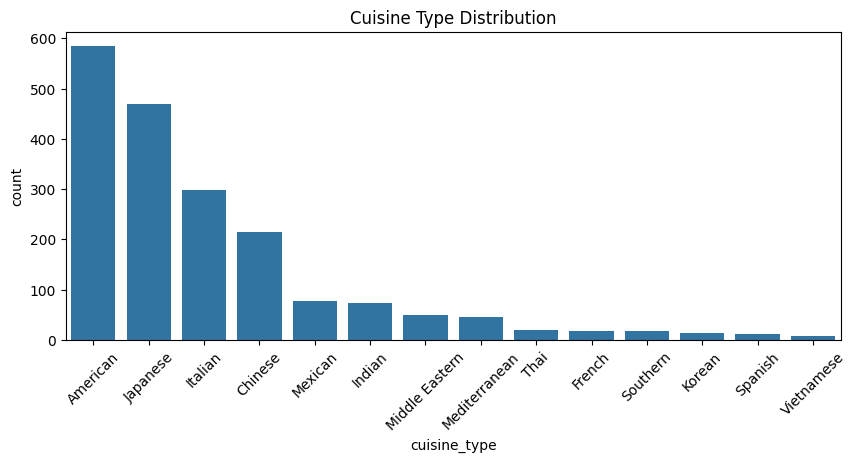

In [10]:
# Cuisine Type
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.title('Cuisine Type Distribution')
plt.xticks(rotation=45)
plt.show()

#### Observations:

* As shown in the countplot, American cuisine leads in popularity, followed by Japanese and Italian.

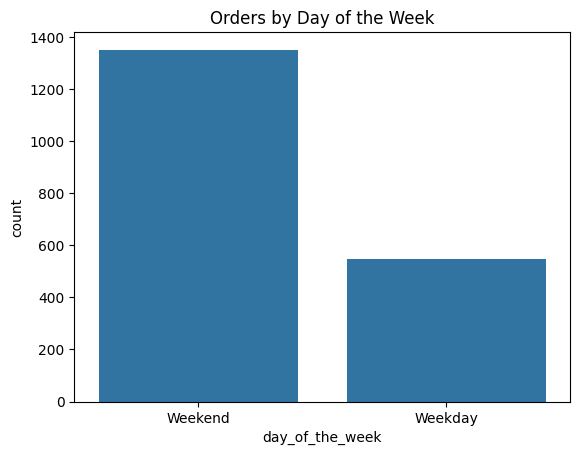

In [11]:
# Day of the Week
sns.countplot(data=df, x='day_of_the_week')
plt.title('Orders by Day of the Week')
plt.show()

#### Observations:

* As shown in the countplot, dining activity peaks on the weekend.

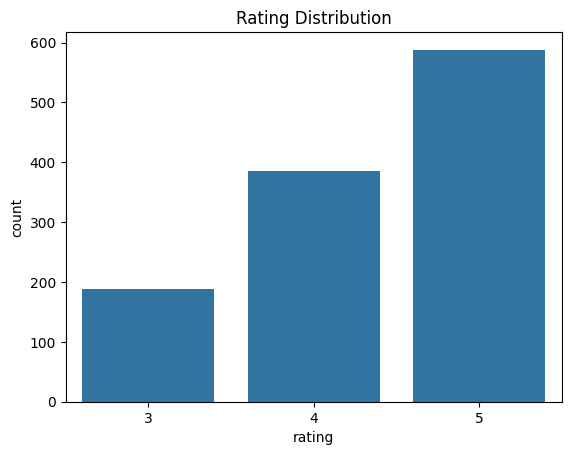

In [12]:
# Ratings (including NaNs)
sns.countplot(data=df, x='rating')
plt.title('Rating Distribution')
plt.show()

#### Observations:

* Out of 1,898 total orders, 736 were not rated, indicating a substantial portion of missing feedback.
* Among the rated orders, none received a rating below 3, suggesting generally positive customer experiences.
* Rating 5 was the most frequent, highlighting a strong trend toward high satisfaction.

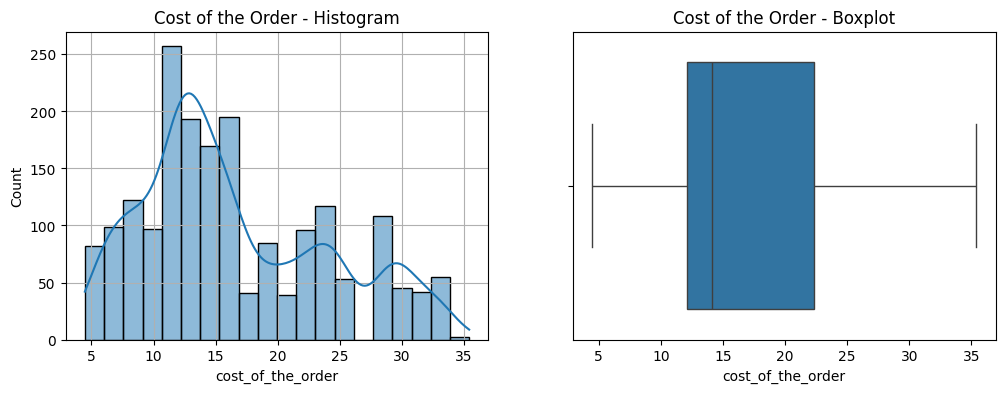

In [21]:
# Cost of the Order

# Creates two side by side plots (one by two)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Histogram for Cost of the Order with KDE (left plot)
sns.histplot(df['cost_of_the_order'], bins=20, ax=ax[0], kde=True)
ax[0].set_title('Cost of the Order - Histogram')
ax[0].grid(True)

# Boxplot for Cost of the Order (right plot)
sns.boxplot(x=df['cost_of_the_order'])
plt.title('Cost of the Order - Boxplot')

plt.show()

#### Observations:

* Both the histogram and boxplot indicate a right-skewed distribution in the cost of orders, suggesting that most orders are relatively low-cost.
* The histogram shows a primary peak around $13, where the highest concentration of order costs occurs, along with secondary peaks near $24 and $29.
* The boxplot reveals a median cost near $14, confirming that half of the orders fall below this value.
* The mean cost of $16.50 exceeds the median, reinforcing the presence of a right-skewed distribution where higher-cost orders pull the average upward.

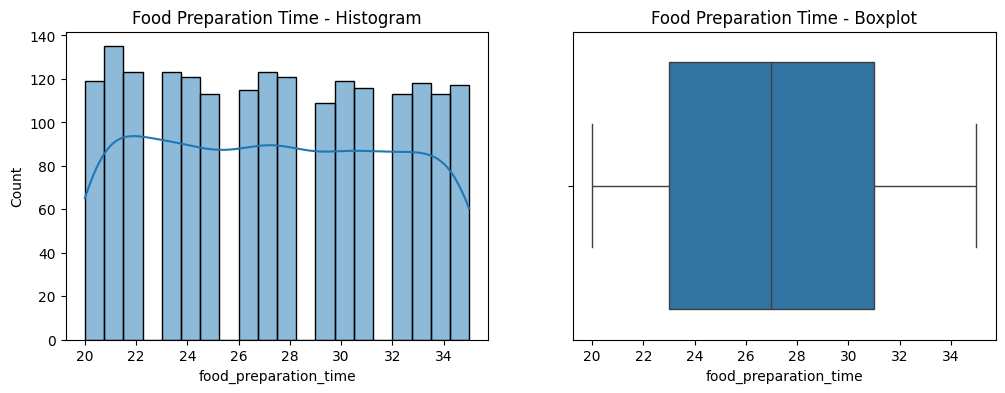

In [22]:
# Food Preparation Time

# Creates two side by side plots (one by two)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Histogram for Food Preparation Time with KDE (left plot)
sns.histplot(df['food_preparation_time'], bins=20, ax=ax[0], kde=True)
ax[0].set_title('Food Preparation Time - Histogram')

# Boxplot for Food Preparation Time (right plot)
sns.boxplot(x=df['food_preparation_time'], ax=ax[1])
ax[1].set_title('Food Preparation Time - Boxplot')

plt.show()

#### Observations:

* Both the histogram and boxplot suggest a fairly uniform distribution of food preparation times, with no strong skew or clustering. 
* The mean and median are both approximately 27 minutes, indicating a balanced central tendency.

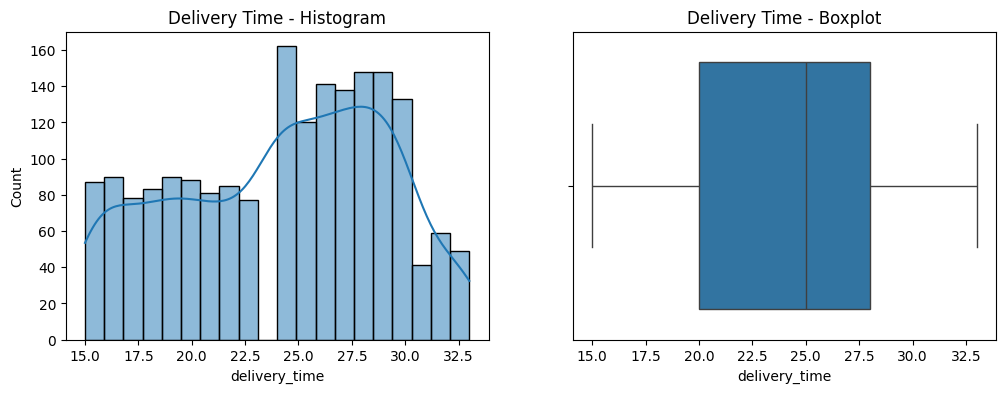

In [23]:
# Delivery Time

# Creates two side by side plots (one by two)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Histogram for Delivery Time with KDE (left plot)
sns.histplot(df['delivery_time'], bins=20, ax=ax[0], kde=True)
ax[0].set_title('Delivery Time - Histogram')

# Boxplot for Delivery Time (right plot)
sns.boxplot(x=df['delivery_time'], ax=ax[1])
ax[1].set_title('Delivery Time - Boxplot')
plt.show()

#### Observations:

* The histogram displays a multimodal distribution, with a relatively flat region on the left (suggesting a near-uniform spread of shorter delivery times) followed by a distinct peak around 28 minutes, where delivery times are most concentrated.
* The boxplot reveals a median time near 25 minutes, confirming that half of the delivery times fall below this value.
* The mean delivery time is 24 minutes, which is slightly less than the median—this may suggest a mild left skew, but the histogram indicate a more balanced or slightly right-skewed distribution overall (with a longer tail on the right).

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

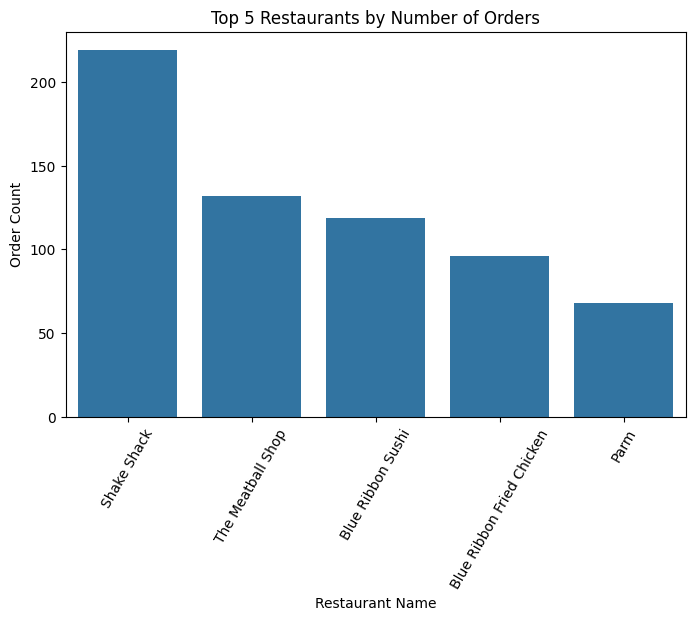

In [58]:
# Get a list of top 5 restaurant names by highest number of orders and extracts their names
top_5 = df['restaurant_name'].value_counts().head(5).index

# Plot of top_5 restaurant names ordered by highest to lowest number of orders
plt.figure(figsize=(8, 5))
sns.countplot(data=df[df['restaurant_name'].isin(top_5)], x='restaurant_name', order=top_5)
plt.title('Top 5 Restaurants by Number of Orders')
plt.xlabel('Restaurant Name')
plt.ylabel('Order Count')
plt.xticks(rotation=60)
plt.show()


#### Observations:

* Shake Shack is the first-place restaurant and received approximately 220 orders, outperforming the second-place restaurant (The Meatball Shop) by about 60 orders.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

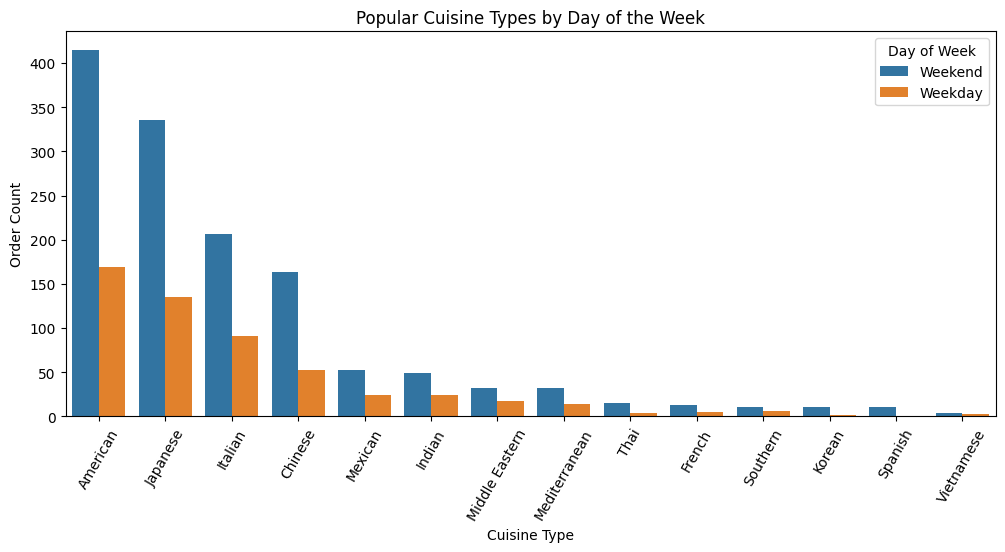

In [ ]:
# Sort cuisine types by overall popularity
order = df['cuisine_type'].value_counts().index

# Plot of Cuisine Types with Day of the Week as hue, ordered by overall popularity
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week', order=order)
plt.title('Popular Cuisine Types by Day of the Week')
plt.xlabel('Cuisine Type')
plt.ylabel('Order Count')
plt.xticks(rotation=60)
plt.legend(title='Day of Week')
plt.show()

#### Observations:

* Among the top three cuisine types—American, Japanese, and Italian—American cuisine is the most ordered on the weekend and overall.
* American cuisine leads with approximately 410 weekend orders, exceeding Japanese cuisine by about 50 weekend orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

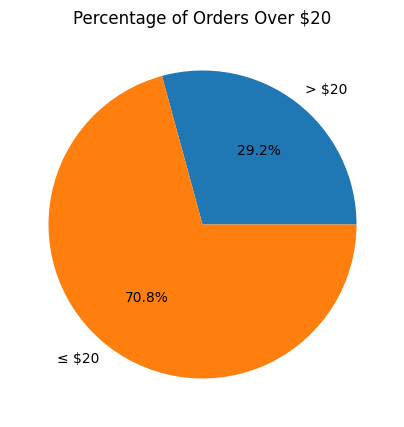

In [ ]:
# Calculate the percentage of orders that cost more than $20

# This creates a boolean Series of True/False that .mean() converts to 0s and 1s, then multiplies by 100 to get percentage
percentage_above_20 = (df['cost_of_the_order'] > 20).mean() * 100

# Pie chart of orders above and below $20
plt.figure(figsize=(5, 5))
plt.pie(
    [percentage_above_20, 100 - percentage_above_20],   # Blue slice = orders > $20, Orange slice = orders ≤ $20
    labels=['> $20', '≤ $20'],                          # Labels for the slices
    autopct='%1.1f%%')                                  # Display percentage on each slice with one decimal place
plt.title('Percentage of Orders Over $20')
plt.show()



#### Observations:

* Approximately `30%` of orders cost more than $20, while the majority — 70% — were priced at $20 or less.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Mean order delivery time with two decimal places
mean_delivery_time = round(df['delivery_time'].mean(), 2)
mean_delivery_time

np.float64(24.16)

#### Observations:

* The average delivery time is approximately 24 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [64]:
# Get a list of top 5 customers by highest number of orders and extracts their ids
top_5 = df['customer_id'].value_counts().head(5).reset_index()
top_5.columns = ['customer_id', 'order_count']
top_5

,customer_id,order_count
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,259341,7


#### Observations:

* The top five customers by number of orders are: customer `52832` with 13 orders, customer `47440` with 10 orders, customer `83287` with 9 orders, customer `250494` with 8 orders, and customer `259341` with 7 orders
* The top five customers placed between 7 and 13 orders each, with customer `52832` leading at 13 total orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# Write the code here

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---